## Covid-19 no mundo

**Nome**: Gabriel Meirelle Carvalho Orlando

**RA** : 790728

- Este notebook tem como intuito analisar os dados sobre o covid-19 no mundo no dia 15/12/2022

- Este notebook é uma atividade para a matéria de Banco de Dados Para Ciência de Dados (2022/2)

- Para isto será utilizado uma série de ferramentas como por exemplo o pandas, numpy e o mongoDB

### Importando conjunto de dados

- Para importar o conjunto de dados que está sendo analisado deve-se seguir os seguintes passos:
    - Abrir o seguinte link: https://github.com/owid/covid-19-data/tree/master/public/data/
    - Este link leva direto para o repositório no GitHub do sistema que coleta as informações sobre o Covid-19 no mundo
    - Após isso, deve-se clicar no formato do arquivo que deseja ser baixado, nesse caso foi o formato '.csv'
    - Após isso, deve-se move o arquivo para a área em que será feita a análise (Collab,Jupyter-Notebook,Jupyter-Lab, etc...)

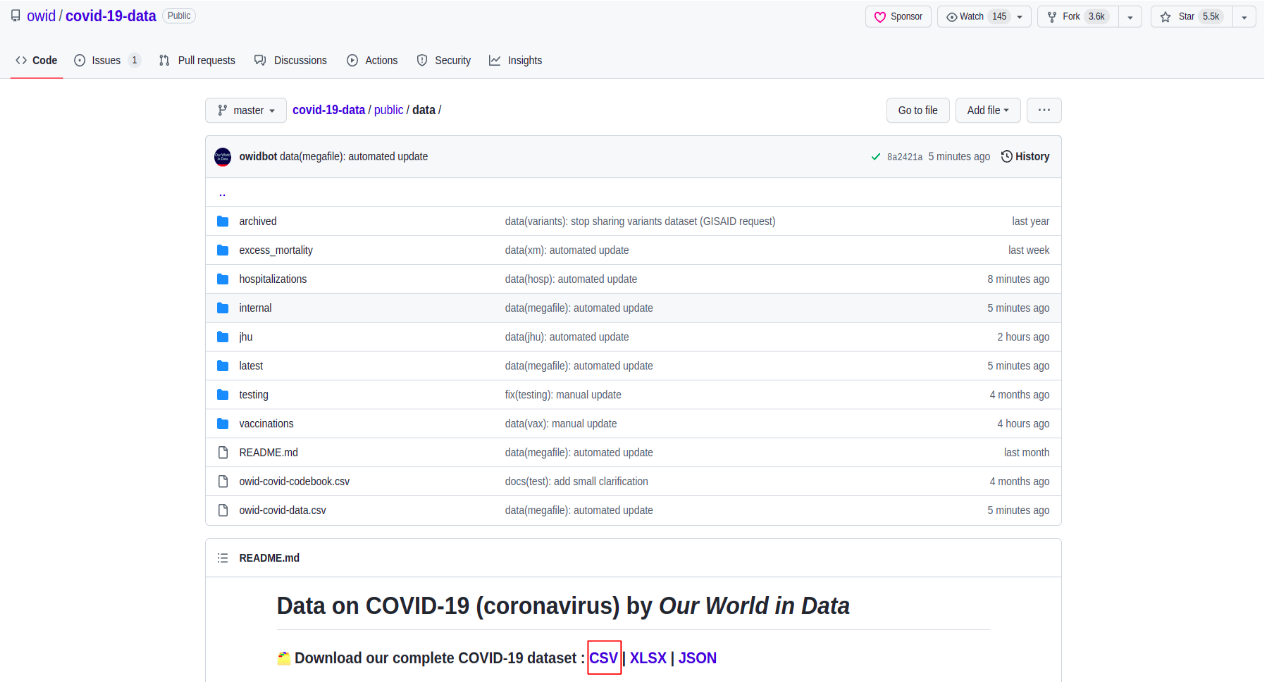

In [2]:
import pandas as pd
data = pd.read_csv('owid-covid-data.csv', header=0)

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
#Dimensões do conjunto de dados
data.shape

(242679, 67)

In [118]:
n_paises = len(data['location'].unique())

- Este conjunto é bem extenso, possuindo mais de 200 mil linhas e 67 dimensões

### Tarefas

- A primeira análise que deverá ser feita é: Listar o nome dos países, seu continente e o total de testes de covid realizados, o total de mortos por covid e o número de vacinados por covid.

- A segunda análise que deverá ser feita é: Listar o nome dos continentes e exiba o total de testes de covid realizados, o total de mortos por covid e o número de vacinados por covid. Lembre-se que essa operação usa agrupamento.

- A terceira análise que deverá ser feita é: Existe alguma relação entre a média de idade dos moradores dos países e a taxa de mortalidade? Crie uma consulta que permita relacionar essas duas informações.



### Arrumando o dataset

- Este dataset possui problemas que podem influenciar fortemente no desenvolvimento deste trabaloho

In [111]:
data [data['continent'].isna()]['location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

- Como a tarefa é: contar as estátisticas por país e contar a estátistica por continente, utilizando ferramentar no MongoDB e não características do próprio conjunto de dados,é interessante excluir linhas que não representam países, mas representam continente, o mundo ou características das entradas

- Para realizar isso de maneira simples, basta dropas as linhas que o atributo continente seja nulo, já que quando isto acontece a linha não está representando um país

- O número de localizações anteriores está guardada na variável 'n_paises', para que possa ser comparado o número de localizações após a remoção das linhas que continham continente nulos

In [120]:
na_conts = len(data [data['continent'].isna()]['location'].unique()) 
data = data.dropna(subset=['continent'])
assert len(data['location'].unique()) + na_conts == n_paises

In [121]:
data.shape

(229031, 67)

### Colunas

In [7]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Adicionando valores a uma lista

In [122]:
main_fdata = []


columns = data.columns
rows,cols = data.shape
for index, row in data.iterrows():
        fdata = {}
        for i in range(cols):
                fdata[columns[i]] = row[columns[i]]
        main_fdata.append(fdata)

### Criando o MongoDB

- Criando o cliente do Mongo

- Para o cliente rodar, é necessário ter o mongo instalado no ambiente que está sendo utilizado e digitar o seguinte comando:
    - sudo systemctl start mongod

In [123]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)

- Cria o banco de dados com o nome de Covid-19

In [129]:
db = client['Covid-19']

- Insere todo os dados da lista criada no banco de dados por meio do comando insert_many

In [130]:
posts = db.posts
result = posts.insert_many(main_fdata)

- Verifica se todos os dados foram inseridos com êxito

In [131]:
assert len(result.inserted_ids) == data.shape[0]

### Primeira análise

**Listar o nome dos países, seu continente e o total de testes de covid realizados, o total de mortos por covid e o número de vacinados por covid.**

In [133]:
i = 0
for post in posts.aggregate([{"$group": {'_id':"$location"
                                         ,"maxValue": {"$max":"$total_deaths"},
                                         "maxValue2": {"$max":"$total_tests"}, 
                                         "maxValue3": {"$max":"$total_vaccinations"}
                                        }}]):
    continent = posts.find_one({"location": post['_id']})['continent']
    
    print("-------------------------------------------------------------------")
    print(f"Location = {post['_id']}")
    print(f"Continent = {continent}")
    print(f"Total Tests = {post['maxValue2']}")
    print(f"Total deaths = {post['maxValue']}")
    print(f"Total vaccinations = {post['maxValue3']}")
    print("-------------------------------------------------------------------\n")
    i += 1

-------------------------------------------------------------------
Location = Kosovo
Continent = Europe
Total Tests = 1846365.0
Total deaths = 3202.0
Total vaccinations = 1836959.0
-------------------------------------------------------------------

-------------------------------------------------------------------
Location = Kuwait
Continent = Asia
Total Tests = 8208880.0
Total deaths = 2570.0
Total vaccinations = 8254305.0
-------------------------------------------------------------------

-------------------------------------------------------------------
Location = Indonesia
Continent = Asia
Total Tests = 59503735.0
Total deaths = 160311.0
Total vaccinations = 442013256.0
-------------------------------------------------------------------

-------------------------------------------------------------------
Location = Samoa
Continent = Oceania
Total Tests = nan
Total deaths = 29.0
Total vaccinations = 526775.0
-------------------------------------------------------------------

-

- Verificando se todos os países foram contemplados

In [135]:
assert i == len(data['location'].unique())

### Segunda análise

**- A segunda análise que deverá ser feita é: Listar o nome dos continentes e exiba o total de testes de covid realizados, o total de mortos por covid e o número de vacinados por covid. Lembre-se que essa operação usa agrupamento.**

In [137]:
i = 0
for post in posts.aggregate([{"$group": {'_id':"$continent"
                                         ,"maxValue": {"$max":"$total_deaths"},
                                         "maxValue2": {"$max":"$total_tests"}, 
                                         "maxValue3": {"$max":"$total_vaccinations"}
                                        }}]):
    
    print("-------------------------------------------------------------------")
    print(f"Continent= {post['_id']}")
    print(f"Total Tests = {post['maxValue2']}")
    print(f"Total deaths = {post['maxValue']}")
    print(f"Total vaccinations = {post['maxValue3']}")
    print("-------------------------------------------------------------------\n")
    i += 1

-------------------------------------------------------------------
Continent= Asia
Total Tests = 9214000000.0
Total deaths = 530663.0
Total vaccinations = 3451677000.0
-------------------------------------------------------------------

-------------------------------------------------------------------
Continent= North America
Total Tests = 912769124.0
Total deaths = 1086199.0
Total vaccinations = 657927289.0
-------------------------------------------------------------------

-------------------------------------------------------------------
Continent= Europe
Total Tests = 503270347.0
Total deaths = 384861.0
Total vaccinations = 190112756.0
-------------------------------------------------------------------

-------------------------------------------------------------------
Continent= Oceania
Total Tests = 73370295.0
Total deaths = 16512.0
Total vaccinations = 63505559.0
-------------------------------------------------------------------

------------------------------------------

- Verificando se todos os continentes foram contemplados

In [138]:
assert i == len(data['continent'].unique())

### Terceira Análise

**- A terceira análise que deverá ser feita é: Existe alguma relação entre a média de idade dos moradores dos países e a taxa de mortalidade? Crie uma consulta que permita relacionar essas duas informações.**

In [139]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [141]:
import numpy as np

In [174]:
data[data['total_deaths'] > data['total_cases']]['location'].unique()

array(['North Korea'], dtype=object)

In [170]:
data[data['location'] == 'North Korea']['total_deaths'].max()

6.0

In [171]:
data[data['location'] == 'North Korea']['total_cases'].max()

1.0

In [159]:
i = 0
tam = len(data['location'].unique())
medianas = np.zeros(tam)
taxas_morte = np.zeros(tam)
for post in posts.aggregate([{"$group": {'_id':"$location"
                                         ,"mortes_totais": {"$max":"$total_deaths"},
                                         "casos_totais": {"$max":"$total_cases"},
                                         "idade_mediana":{"$max":"$median_age"}
                                        }}]):    
    taxa_morte = post['mortes_totais'] / float(post['casos_totais'])
    if taxa_morte > 1:
        taxa_morte = 0
    medianas[i] = post['idade_mediana']
    taxas_morte[i] = taxa_morte
    i += 1

0.011762458581598842
0.0038777995222913117
0.023911782762860913
0.0018159048215403881
0.033283866864532545
0.01148402945429683
0.00808358571880776
0.007160699249625517
nan
0.010293076337813848
0.022093695777906305
nan
0.003318909381170441
0.012045889101338431
0.002612259604557943
0.02538820334179607
0.008116855415313384
0.006590999681924878
0.013314357823174524
0.020962906063384294
0.03282702335071412
0.011045771811069867
0.0010934585450569241
0.027807310028766182
0.00557016865232864
0.003781372503563134
0.025021733434954507
0.029556650246305417
0.005443658138268917
0.010108941014819904
0.002204644948954872
0.00021640337589266391
0.005306212690692019
0.008408712855694557
0.0017323678734131188
0.0043243523869493615
0.0034877514585979056
0.017890989783181543
0.002933880102699022
0.0062258392675483215
0.007513066202090592
0.07841289288911926
0.010880230480119211
0.007371553603675636
0.005702066999287242
nan
6.0
North Korea
0.046129010706654844
0.007853593945504682
0.008495559070446527
0.0

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

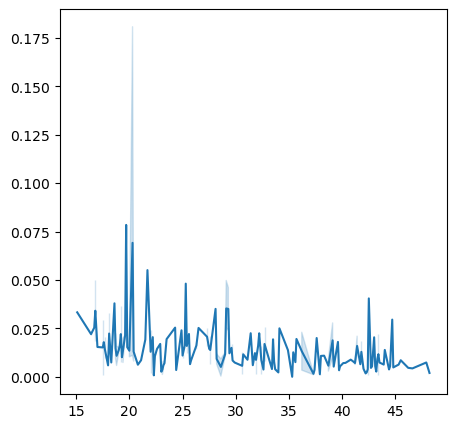

In [165]:
f, axes = plt.subplots(figsize=(5, 5), sharex=False)
sns.lineplot(y=taxas_morte,x=medianas)
plt.show()